# Version 3
Revision notes:

- binning the total embryos

# Import libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
import pickle

plt.rcParams.update({'font.size': 15})

# Select what to do

In [22]:
before_ivf = 0
feature_select = 0
pca = 0
# set to one to calibrate the models and save them
calibration = 1
# set to one to evaluate the models and save them
evaluate = 0
# if models are saved, set the load_model to 1
load_model = 0


In [23]:
savepath = '../saved_models/'

In [24]:
# Searborn bar annotate function
def annotate_bar(ax):
    for bar in ax.patches: 

      # Using Matplotlib's annotate function and 
      # passing the coordinates where the annotation shall be done 
      # x-coordinate: bar.get_x() + bar.get_width() / 2 
      # y-coordinate: bar.get_height() 
      # free space to be left to make graph pleasing: (0, 8) 
      # ha and va stand for the horizontal and vertical alignment 
        ax.annotate(format(bar.get_height(), '.2f'),  
                       (bar.get_x() + bar.get_width() / 2,  
                        bar.get_height()), ha='center', va='center', 
                       size=15, xytext=(0, 8), 
                       textcoords='offset points') 

In [25]:
df3 = pd.read_csv('../UK Datasets/ar-2005-2009-xlsb.csv')
df2 = pd.read_csv('../UK Datasets/ar-2010-2014-xlsb.csv')
df1 = pd.read_csv('../UK Datasets/ar-2015-2016-xlsb.csv')


# df = pd.concat([df1, df2, df3], axis=0).reset_index()
df = df1

/Users/arash/opt/anaconda3/envs/streamlit/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6,7,8,9,11,29,32,43,48,50,51,52,54,83,89,90,91,92) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/arash/opt/anaconda3/envs/streamlit/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6,9,29,31,32,43,48,49,50,51,53,54,59,60,77,83,89,90,91,92) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/arash/opt/anaconda3/envs/streamlit/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6,7,29,31,32,43,48,50,51,52,53,54,77,83,89,90,91,92) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
print(df.shape)
df.head()

(158519, 95)


,Patient Age at Treatment,Date patient started trying to become pregnant OR date of last pregnancy,"Total Number of Previous cycles, Both IVF and DI","Total Number of Previous treatments, Both IVF and DI at clinic",Total Number of Previous IVF cycles,Total Number of Previous DI cycles,"Total number of previous pregnancies, Both IVF and DI",Total number of IVF pregnancies,Total number of DI pregnancies,Total number of live births - conceived through IVF or DI,...,Heart Three Birth Weight,Heart Three Sex,Heart Three Delivery Date,Heart Three Birth Congenital Abnormalities,Heart Four Weeks Gestation,Heart Four Birth Outcome,Heart Four Birth Weight,Heart Four Sex,Heart Four Delivery Date,Heart Four Birth Congenital Abnormalities
0,40-42,NaN,2,2,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,45-50,NaN,3,3,3,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35-37,NaN,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18 - 34,NaN,2,2,2,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18 - 34,NaN,5,5,5,0,1,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df.columns

Index(['Patient Age at Treatment',
       'Date patient started trying to become pregnant OR date of last pregnancy',
       'Total Number of Previous cycles, Both IVF and DI',
       'Total Number of Previous treatments, Both IVF and DI at clinic',
       'Total Number of Previous IVF cycles',
       'Total Number of Previous DI cycles',
       'Total number of previous pregnancies, Both IVF and DI',
       'Total number of IVF pregnancies', 'Total number of DI pregnancies',
       'Total number of live births - conceived through IVF or DI',
       'Total number of live births - conceived through IVF',
       'Total number of live births - conceived through DI',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease'

# Select columns and shorten the names


In [28]:
cols = {'Patient Age at Treatment':'age',
       'Total Number of Previous IVF cycles':'nr_prev_ivf',
       'Total number of IVF pregnancies': 'nr_ivf_preg',
       'Total number of live births - conceived through IVF': 'nr_ivf_live_birth',
       'Type of Infertility - Female Primary': 'female_primary',
       'Type of Infertility - Female Secondary': 'female_secondary',
       'Type of Infertility - Male Primary': 'male_primary',
       'Type of Infertility - Male Secondary': 'male_secondary',
       'Type of Infertility -Couple Primary': 'couple_primary',
       'Type of Infertility -Couple Secondary': 'couple_secondary',
       'Cause  of Infertility - Tubal disease': 'cause_tubal',
       'Cause of Infertility - Ovulatory Disorder': 'cause_ovulatory',
       'Cause of Infertility - Male Factor': 'cause_male',
       'Cause of Infertility - Patient Unexplained': 'cause_unexplained',
       'Cause of Infertility - Endometriosis': 'cause_endometriosis',
       'Cause of Infertility - Cervical factors': 'cause_cervical',
       'Cause of Infertility - Female Factors': 'cause_female',
       'Cause of Infertility - Partner Sperm Concentration': 'cause_sperm_concentrate',
       'Cause of Infertility -  Partner Sperm Morphology': 'cause_sperm_morph',
       'Causes of Infertility - Partner Sperm Motility': 'cause_sperm_mobility',
       'Cause of Infertility -  Partner Sperm Immunological factors': 'cause_sperm_immun', 
       'Main Reason for Producing Embroys Storing Eggs': 'reason_storing_egg',
       'Stimulation used': 'is_stimul',
       'Type of Ovulation Induction': 'ovul_induc',
       'Egg Donor Age at Registration': 'egg_donor_age',
       'Sperm Donor Age at Registration': 'sperm_donor_age',
       'Donated embryo': 'donated_embryo',
       'Specific treatment type': 'treat_type',
       'PGD': 'pgd',
       'PGS': 'pgs',
       'Elective Single Embryo Transfer': 'elec_single_embryo_trans',
       'Egg Source': 'egg_source',
       'Sperm From': 'sperm_source',
       'Fresh Eggs Collected': 'fresh_egg_collected',
       'Fresh Eggs Stored': 'fresh_egg_stored',
       'Total Eggs Mixed': 'total_egg_mixed',
       'Fresh Cycle': 'fresh_cycle', 
       'Frozen Cycle': 'frozen_cycle',
       'Eggs Mixed With Partner Sperm': 'eggs_mixed_partner_sperm',
       'Total Embryos Created': 'tot_embryo',
       'Embryos Transfered': 'embryos_transfered',
       'Live Birth Occurrence': 'is_live_birth',
       'Number of Live Births': 'nr_live_birth',
       'Early Outcome': 'early_outcome'}

In [29]:
df_cols = df[cols].rename(columns=cols)
df_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158519 entries, 0 to 158518
Data columns (total 44 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   age                       158519 non-null  object 
 1   nr_prev_ivf               158519 non-null  object 
 2   nr_ivf_preg               158519 non-null  object 
 3   nr_ivf_live_birth         158519 non-null  int64  
 4   female_primary            158519 non-null  int64  
 5   female_secondary          158519 non-null  int64  
 6   male_primary              158519 non-null  int64  
 7   male_secondary            158519 non-null  int64  
 8   couple_primary            158519 non-null  int64  
 9   couple_secondary          158519 non-null  int64  
 10  cause_tubal               158519 non-null  int64  
 11  cause_ovulatory           158519 non-null  int64  
 12  cause_male                158519 non-null  int64  
 13  cause_unexplained         158519 non-null  i

In [30]:
df_cols['treat_type'].unique()

array(['IVF', 'ICSI', 'Unknown', 'IVF:IVF', 'ICSI:ICSI', 'IVF:Unknown',
       'ICSI:Unknown', 'ICSI:IVF', 'ICSI / BLASTOCYST ', 'IVF:ICSI',
       'ICSI / AH', 'FER', 'IVF / AH', 'IVF / BLASTOCYST',
       'IVF:Unknown:Unknown:Unknown', 'IUI', 'Generic DI', 'IVI', 'ICI'],
      dtype=object)

# Preprocessing

is_live_birth has 1 or Nan. Replace the Nan with zero since it means an unsuccesful cycle and it's easier to deal with

In [31]:
df_cols.is_live_birth = df_cols.is_live_birth.fillna(0)
df_cols.is_live_birth.unique()

array([1., 0.])

## Label encoding - object to int conversion

In [32]:
# Label encoding: convert from string to int, replace the >5 with 6 
df_cols.nr_ivf_preg = df_cols.nr_ivf_preg.replace({'>=5':6})
df_cols.nr_ivf_preg = df_cols.nr_ivf_preg.astype(int)
df_cols.nr_ivf_preg.unique()

array([0, 1, 2, 4, 3, 5, 6])

In [33]:
# Label encoding: convert from string to int, replace the >5 with 6 
df_cols.nr_prev_ivf = df_cols.nr_prev_ivf.replace({'>=5':6})
df_cols.nr_prev_ivf = df_cols.nr_prev_ivf.astype(int)
df_cols.nr_prev_ivf.unique()

array([2, 3, 0, 5, 4, 1, 6])

In [34]:
# convert the fresh_egg_collected from string to int, replace the >50 with 51
df_cols.fresh_egg_collected = df_cols.fresh_egg_collected.replace({'> 50':51})
df_cols.fresh_egg_collected = df_cols.fresh_egg_collected.astype(float)

# convert the tot_embryo from string to int, replace the >50 with 51
df_cols.tot_embryo = df_cols.tot_embryo.replace({'> 50':51})
df_cols.tot_embryo = df_cols.tot_embryo.astype(float)

In [35]:
# convert the tot_embryo from string to int, replace the >50 with 51
df_cols.total_egg_mixed = df_cols.total_egg_mixed.replace({'> 50':51})
df_cols.total_egg_mixed = df_cols.total_egg_mixed.astype(float)

df_cols.total_egg_mixed.unique()

array([ 0.,  3.,  4.,  6.,  1., 13.,  8., 11., 10.,  7., 15.,  9., 21.,
        2., 17., 12.,  5., 16., 33., 14., 24., 20., 23., 19., 18., 22.,
       27., 25., 26., 47., 51., 28., 36., 29., 38., 34., 30., 32., 37.,
       31., 43., 42., 35., 46., 45., 41., 48., 39., 40., 49., 44., 50.,
       nan])

In [36]:
# Label encoding: convert from string to int, replace the >5 with 6 
df_cols.eggs_mixed_partner_sperm = df_cols.eggs_mixed_partner_sperm.replace({'> 50':51})
df_cols.eggs_mixed_partner_sperm = df_cols.eggs_mixed_partner_sperm.astype(float)
df_cols.eggs_mixed_partner_sperm.unique()

array([ 0.,  3.,  4.,  1., 13.,  8., 11., 10.,  7., 15.,  9.,  6.,  2.,
       17., 12.,  5., 16., 33., 14., 24., 21., 23., 19., 18., 20., 22.,
       25., 26., 27., 47., 51., 28., 36., 29., 38., 34., 30., 37., 31.,
       43., 32., 42., 35., 46., 45., 41., 48., 39., 40., 49., 44., 50.,
       nan])

In [37]:
df_cols[['early_outcome', 'is_live_birth']]

,early_outcome,is_live_birth
0,Intrauterine Fetal Pulsation Seen,1.0
1,None,0.0
2,NaN,0.0
3,Biochemical Pregnancy Only,0.0
4,None,0.0
...,...,...
158514,None,0.0
158515,None,0.0
158516,None,0.0
158517,Intrauterine Fetal Pulsation Seen,0.0


## Binning the fresh collected eggs

In [38]:
# bins: (0), (1, 5), (6, 10), (11, 15), (16, 20), (21, 25), (26, 30), (31+)
egg_bins = [-np.inf, 0, 5, 10, 15, 20, 25, 30, np.inf]
egg_labels = ['0', '1', '2', '3', '4', '5', '6', '7']

df_cols['fresh_egg_bin'] = pd.cut(df_cols['fresh_egg_collected'], bins=egg_bins, 
                                  labels=egg_labels, ordered=True).astype(float)

# df_cols[['fresh_egg_bin', 'fresh_egg_collected']].head(5)

## Binning the total embryos

In [39]:
# bins: (0), (1, 5), (6, 10), (11, 15), (16, 20), (21, 25), (26, 30), (31+)
embryo_bins = [-np.inf, 0, 5, 10, 15, 20, 25, 30, np.inf]
embryo_labels = ['0', '1', '2', '3', '4', '5', '6', '7']

df_cols['tot_embryo_bin'] = pd.cut(df_cols['tot_embryo'], bins=embryo_bins, 
                                  labels=embryo_labels, ordered=True).astype(float)

df_cols[['tot_embryo_bin', 'tot_embryo']].head(5)

,tot_embryo_bin,tot_embryo
0,0.0,0.0
1,1.0,3.0
2,0.0,0.0
3,0.0,0.0
4,1.0,4.0


# What percentage the main cause of infertility is female vs. male vs. couple?

In [40]:
print('Main cause of infertility due to:')
print('Female:', df_cols.female_primary.sum())
print('Male:', df_cols.male_primary.sum())
print('Secondary cause of infertility due to:')
print('Female:', df_cols.female_secondary.sum())
print('Male:', df_cols.male_secondary.sum())
print('Primary cause of infertility due to:')
print('Couple:', df_cols.couple_primary.sum())
print('Secondary cause of infertility due to:')
print('Couple:', df_cols.couple_secondary.sum())


Main cause of infertility due to:
Female: 555
Male: 519
Secondary cause of infertility due to:
Female: 228
Male: 228
Primary cause of infertility due to:
Couple: 590
Secondary cause of infertility due to:
Couple: 162


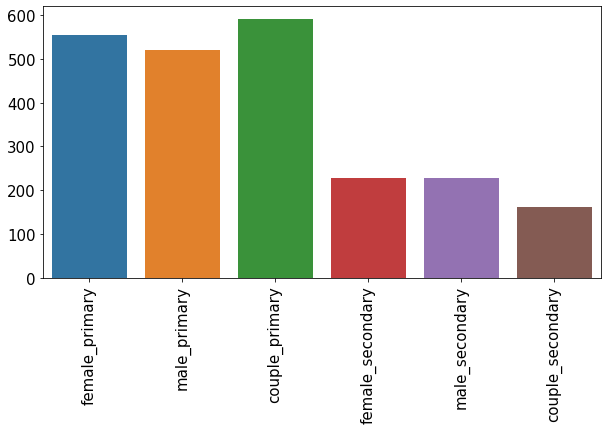

In [41]:
data = df_cols[['female_primary', 'male_primary', 'couple_primary', 
                'female_secondary', 'male_secondary', 'couple_secondary']].sum()
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x=data.index, y=data)
ax.tick_params(axis='x', labelrotation=90)

# Infertility causes

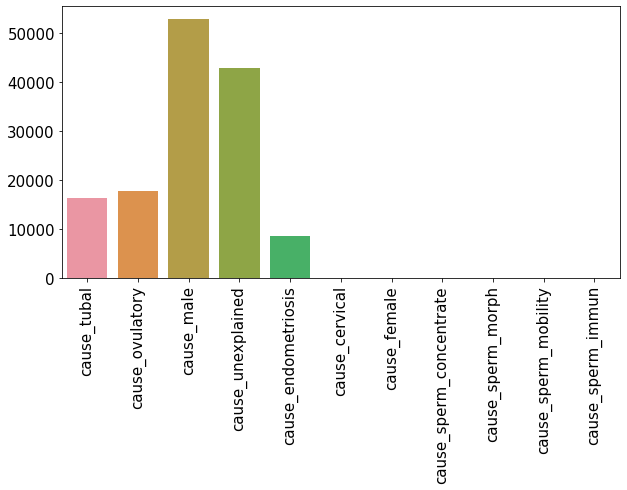

In [42]:
data = df_cols[['cause_tubal', 'cause_ovulatory', 'cause_male', 'cause_unexplained',
                'cause_endometriosis', 'cause_cervical', 'cause_female', 'cause_sperm_concentrate',
               'cause_sperm_morph', 'cause_sperm_mobility', 'cause_sperm_immun']].sum()
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x= data.index, y=data)
ax.tick_params(axis='x', labelrotation=90)

# Egg source

Text(0.5, 1.0, 'Egg Source')

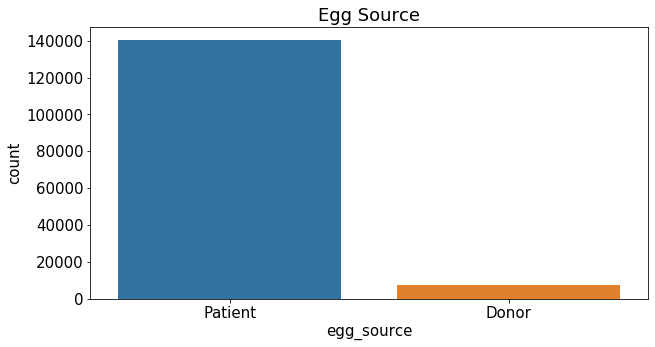

In [43]:
df_cols['egg_source'].unique()
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(df_cols.egg_source)
ax.set_title('Egg Source')

In [44]:
# order = ['<= 20', 'Between 21 and 25', 'Between 26 and 30', 'Between 31 and 35', '999']
# g = sns.catplot(data=df_cols, x='egg_donor_age', col='egg_source', 
#                 kind='count', order=order, height=5)
# g.set_xticklabels(rotation=90)

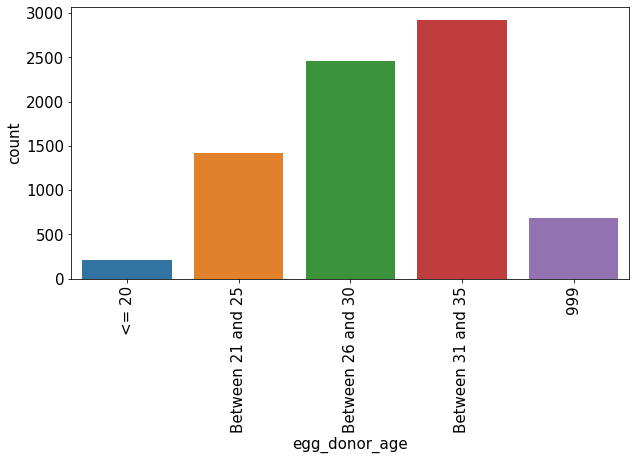

In [45]:
order = ['<= 20', 'Between 21 and 25', 'Between 26 and 30', 'Between 31 and 35', '999']
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(df_cols.egg_donor_age, order=order)
ax.set_xticklabels(rotation=90, labels=order);

# Sperm source

Text(0.5, 1.0, 'Sperm Source')

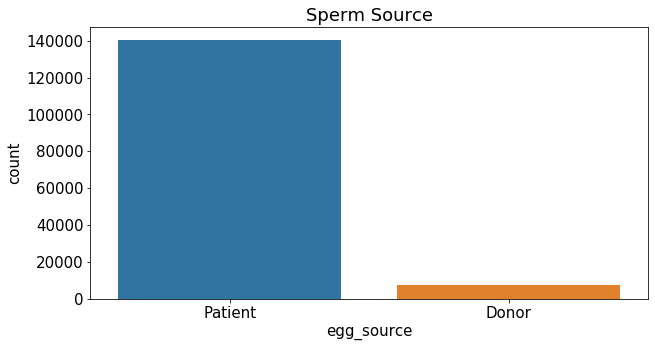

In [46]:
df_cols['sperm_source'].unique()
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(df_cols.egg_source)
ax.set_title('Sperm Source')

In [47]:
# order = ['<= 20', 'Between 21 and 25', 'Between 26 and 30', 'Between 31 and 35', '999']
# g = sns.catplot(data=df_cols, x='sperm_donor_age', col='sperm_source', 
#                 kind='count', order=order, height=5)
# g.set_xticklabels(rotation=90)

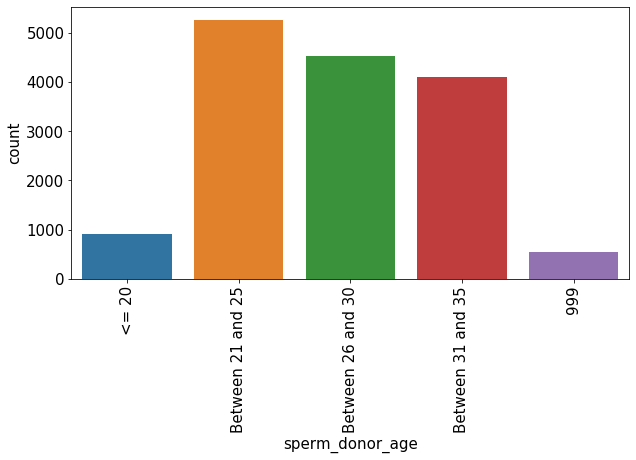

In [48]:
order = ['<= 20', 'Between 21 and 25', 'Between 26 and 30', 'Between 31 and 35', '999']
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(df_cols.sperm_donor_age, order=order)
ax.set_xticklabels(rotation=90, labels=order);

# Donated embryo

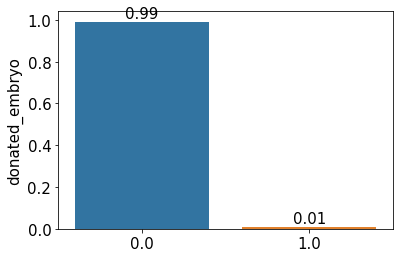

In [49]:
data = df_cols.donated_embryo.value_counts(normalize=True)
ax = sns.barplot(x= data.index, y=data)
annotate_bar(ax)

# Fresh Eggs

We should convert the fresh_egg_collected from string to int, and replace the >50 with 1000.
We should select the rows where the egg source is patient and cycle is fresh. Also, since in IUI, egg is not retrieved. It's better to look at IVF and ICSI treatments only

Average of fresh egg collected: 9.56
Median of fresh egg collected: 8.0


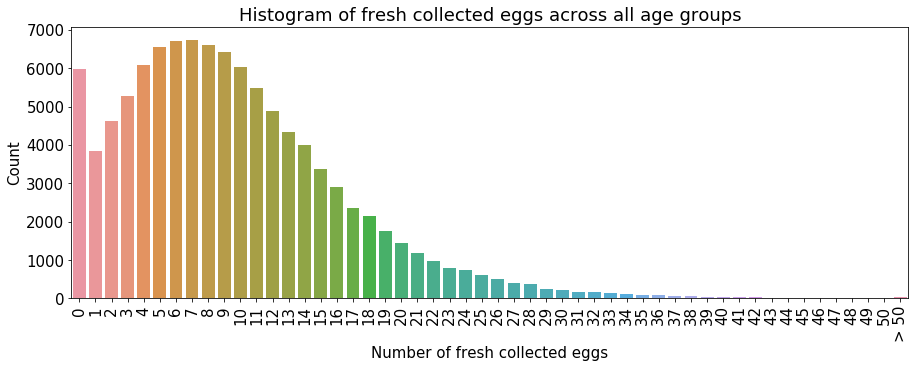

In [50]:
# select the rows where the egg source is patient and cycle is a fresh_cycle
df_fresh = df_cols.loc[(df_cols.fresh_cycle==1) & (df_cols.egg_source=='Patient')]
data = df_fresh.fresh_egg_collected
xlabel = [str(i) for i in np.arange(51)]
xlabel.append('> 50')

print('Average of fresh egg collected:', round(data.mean(), 2))
print('Median of fresh egg collected:', data.median())

fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.countplot(data)
ax.tick_params(axis='x', labelrotation=90)
ax.set_xticklabels(xlabel);
ax.set_title('Histogram of fresh collected eggs across all age groups')
ax.set_xlabel('Number of fresh collected eggs');
ax.set_ylabel('Count');

Text(0.5, 0, 'Age group')

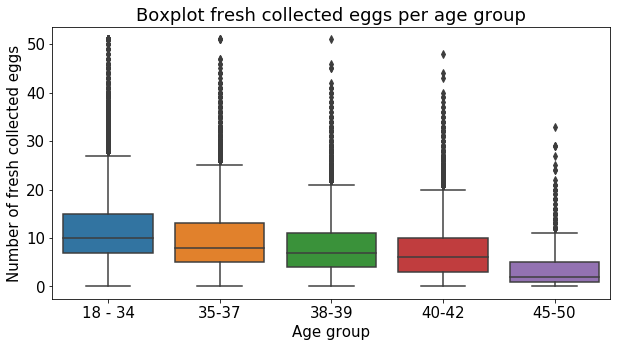

In [51]:
order = ['18 - 34', '35-37', '38-39', '40-42', '45-50']
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.boxplot(x='age', y='fresh_egg_collected', data=df_fresh[df_fresh.age!='999'], order=order)
ax.set_title('Boxplot fresh collected eggs per age group')
ax.set_ylabel('Number of fresh collected eggs');
ax.set_xlabel('Age group')

Text(0.5, 0, 'Age group')

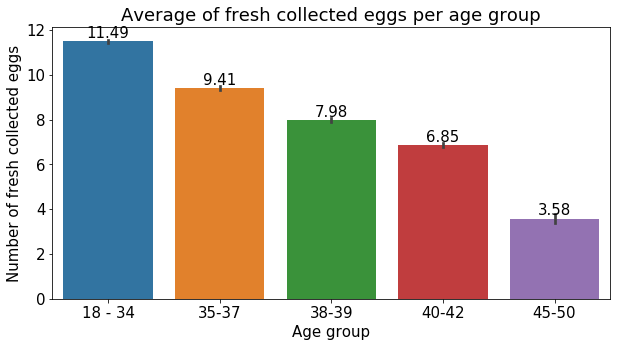

In [52]:
order = ['18 - 34', '35-37', '38-39', '40-42', '45-50']
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x='age', y='fresh_egg_collected', data=df_fresh[df_fresh.age!='999'], order=order, estimator=np.mean)
annotate_bar(ax)
ax.set_title('Average of fresh collected eggs per age group')
ax.set_ylabel('Number of fresh collected eggs');
ax.set_xlabel('Age group')

## Treatment types of fresh cycles

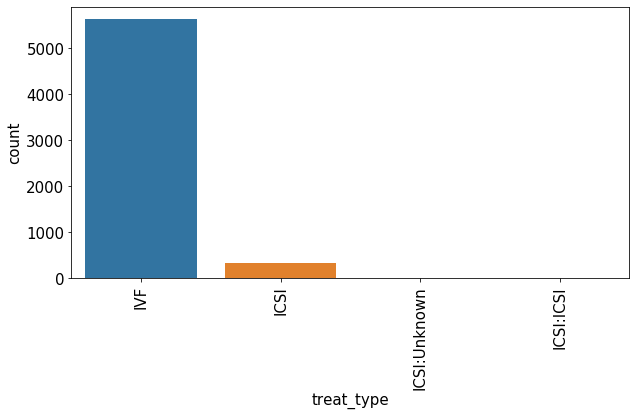

In [53]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(df_fresh[df_fresh.fresh_egg_collected==0].treat_type)
ax.tick_params(axis='x', labelrotation=90)

# Total embryos created

Mean of total embryos collected: 5.15
Median of total embryos collected: 4.0


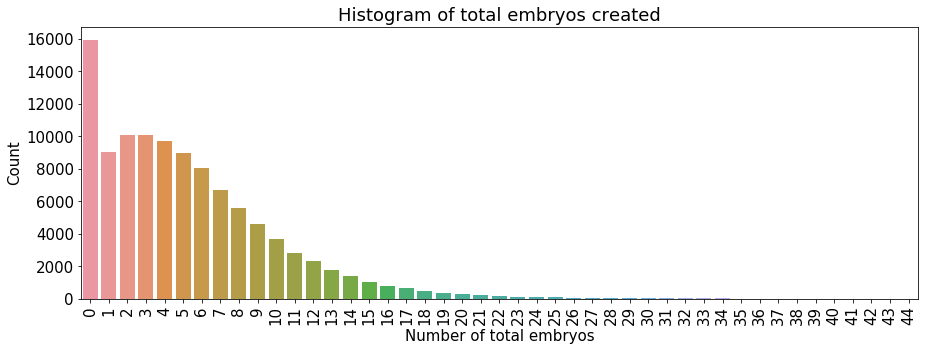

In [54]:
data = df_fresh.tot_embryo
xlabel = [str(i) for i in np.arange(45)]
xlabel.append('> 50')

print('Mean of total embryos collected:', round(data.mean(), 2))
print('Median of total embryos collected:', data.median())

fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.countplot(data)
ax.tick_params(axis='x', labelrotation=90)
ax.set_xticklabels(xlabel);
ax.set_title('Histogram of total embryos created');
ax.set_ylabel('Count')
ax.set_xlabel('Number of total embryos');


# Treatment types

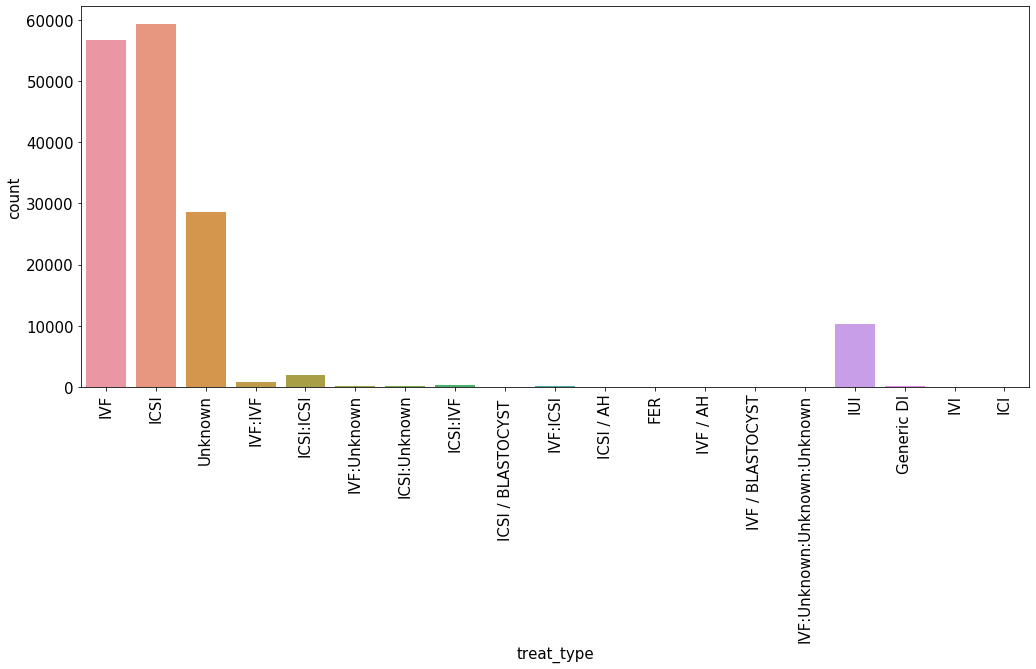

In [55]:
fig, ax = plt.subplots(figsize=(17, 7))
sns.countplot(x='treat_type', data=df_cols, ax=ax)
ax.tick_params(axis='x', labelrotation=90)

# Early outcome

Text(0.5, 1.0, 'Treatment early outcome distribution')

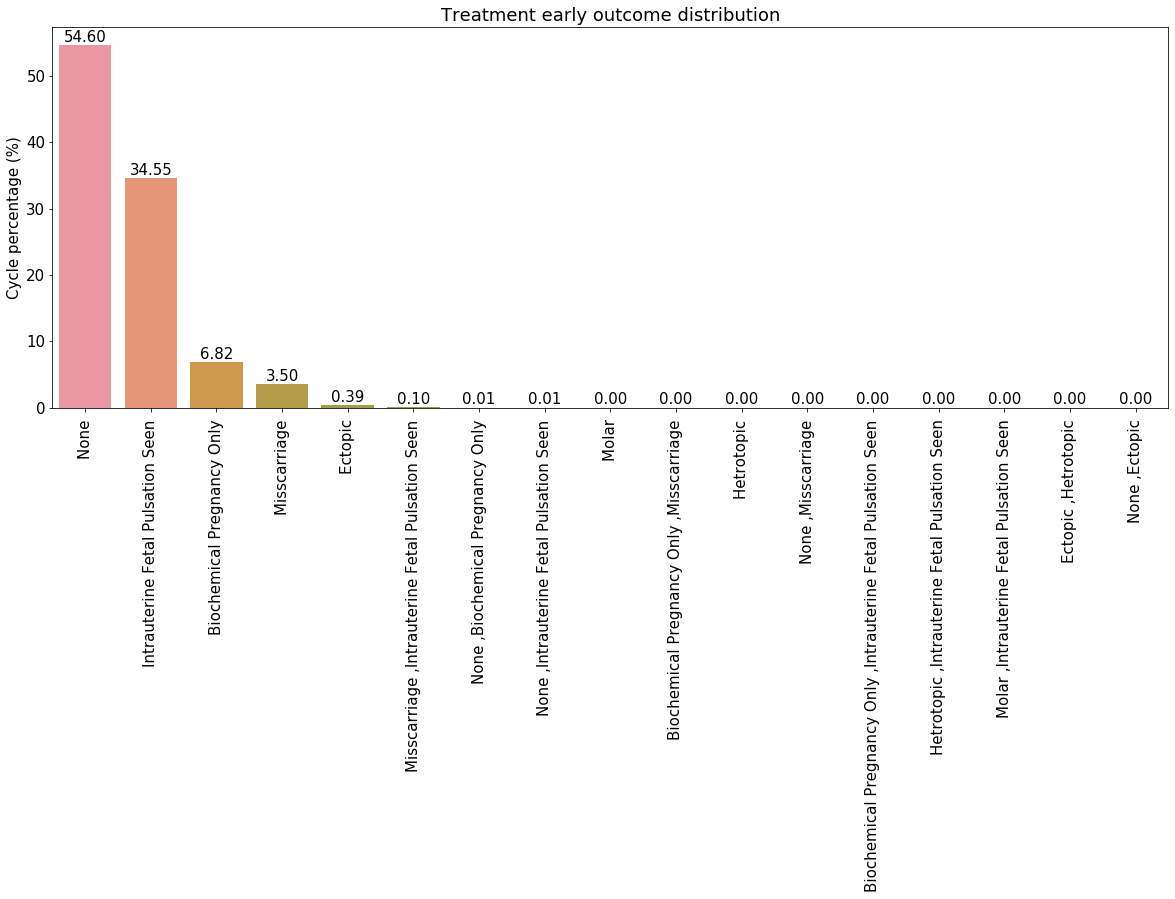

In [56]:
data = df_cols.early_outcome.value_counts(normalize=True)

fig, ax = plt.subplots(figsize=(20,7))
ax = sns.barplot(x=data.index, y=data*100)
annotate_bar(ax)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Cycle percentage (%)')
ax.set_title('Treatment early outcome distribution')

In [57]:
# df_cols.early_outcome.loc[~mask] = 'Other Outcomes'

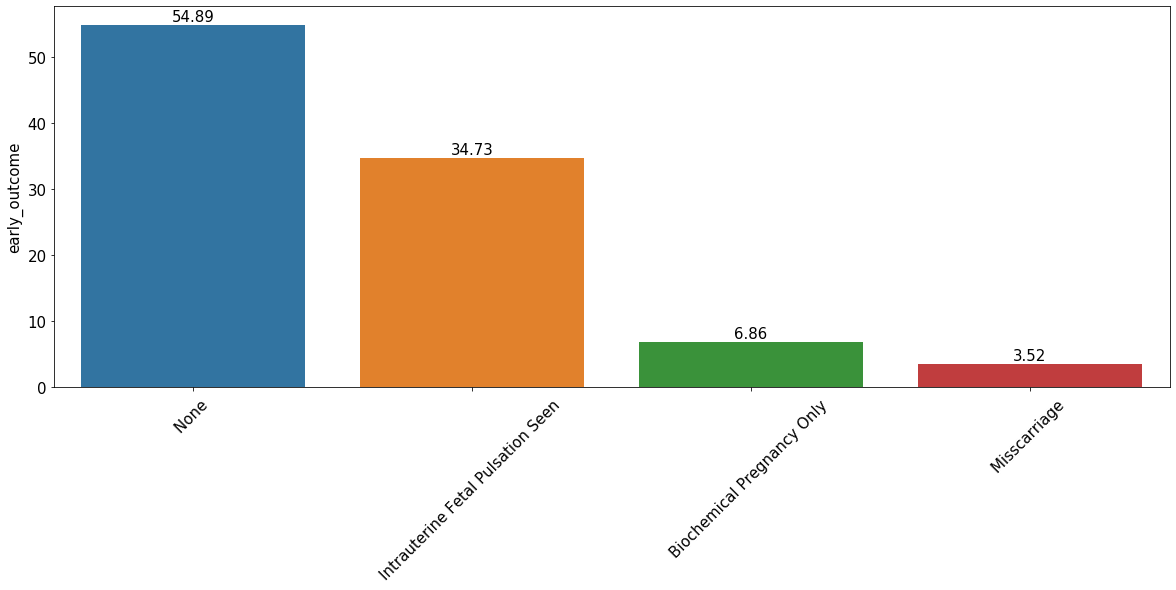

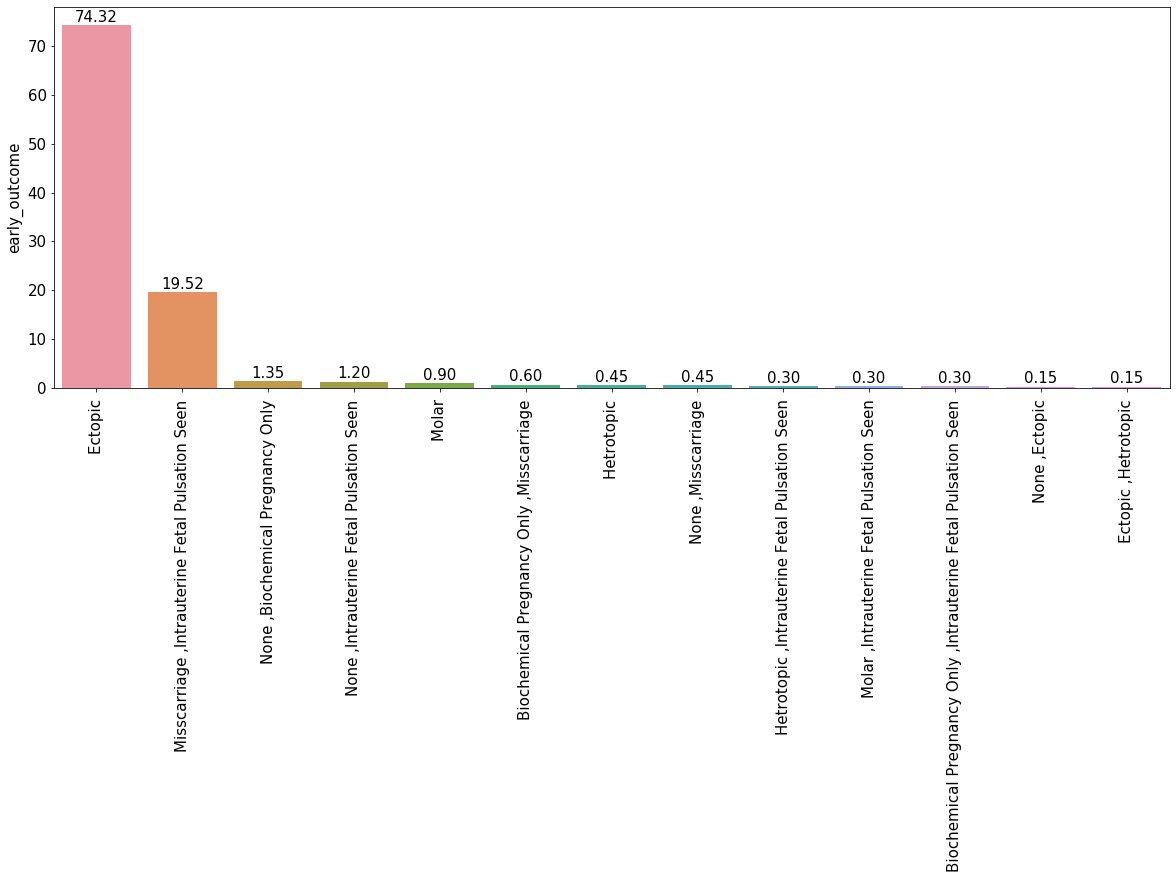

In [58]:
important_outcomes = ['None ', 'Intrauterine Fetal Pulsation Seen ', 'Biochemical Pregnancy Only ', 'Misscarriage ']

mask = df_cols.early_outcome.map(lambda x: True if x in important_outcomes else False)
data_important = df_cols.loc[mask, 'early_outcome'].value_counts(normalize=True)
# replace the other outcomes with 'others'
data_others = df_cols.loc[~mask, 'early_outcome'].value_counts(normalize=True)


fig, ax = plt.subplots(figsize=(20,7))
ax = sns.barplot(x=data_important.index, y=data_important*100)
ax.tick_params(axis='x', labelrotation=45)
annotate_bar(ax)

fig, ax = plt.subplots(figsize=(20,7))
ax = sns.barplot(x=data_others.index, y=data_others*100)
ax.tick_params(axis='x', labelrotation=90)
annotate_bar(ax)

# Live birth 

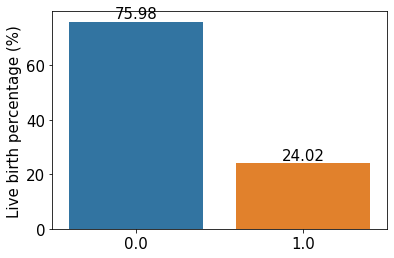

In [59]:
data = df_cols.is_live_birth.value_counts(normalize=True)
ax = sns.barplot(x= data.index, y=data*100)
annotate_bar(ax)
ax.set_ylabel('Live birth percentage (%)');

## Live birth and number of fresh eggs collected

To analyze the correlation between live birth and number of fresh eggs collected, we need to extract the cycles that are indicted to for 'Treatment Now" and not for storage

In [60]:
df_fresh_treat = df_fresh[df_fresh['reason_storing_egg'].dropna().str.contains('Treatment Now')]

Mean of fresh collected eggs in successful cycles: 11.05
Mean of fresh collected eggs in unsuccessful cycles: 8.72


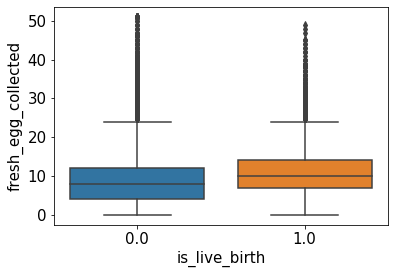

In [61]:
sns.boxplot(x='is_live_birth', y='fresh_egg_collected', data=df_fresh_treat)

print('Mean of fresh collected eggs in successful cycles:', 
      round(df_fresh_treat[df_fresh_treat.is_live_birth==1].fresh_egg_collected.mean(), 2))
print('Mean of fresh collected eggs in unsuccessful cycles:', 
      round(df_fresh_treat[df_fresh_treat.is_live_birth==0].fresh_egg_collected.mean(), 2))

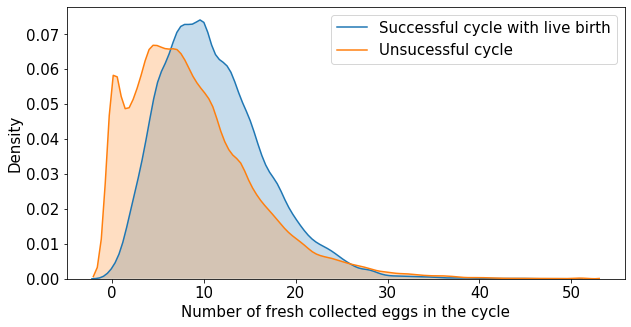

In [62]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.kdeplot(df_fresh_treat[df_fresh_treat.is_live_birth==1].fresh_egg_collected, shade=True)
ax = sns.kdeplot(df_fresh_treat[df_fresh_treat.is_live_birth==0].fresh_egg_collected, shade=True)
ax.legend(['Successful cycle with live birth', 'Unsucessful cycle'])
ax.set_xlabel('Number of fresh collected eggs in the cycle');
ax.set_ylabel('Density');

## Live birth and total number of embryos created

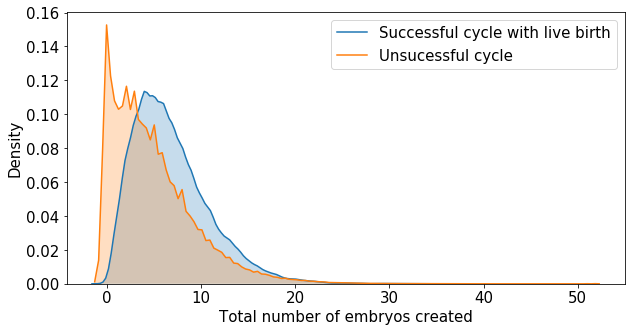

In [63]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.kdeplot(df_fresh_treat[df_fresh_treat.is_live_birth==1].tot_embryo, shade=True)
ax = sns.kdeplot(df_fresh_treat[df_fresh_treat.is_live_birth==0].tot_embryo, shade=True)
ax.legend(['Successful cycle with live birth', 'Unsucessful cycle'])
ax.set_xlabel('Total number of embryos created');
ax.set_ylabel('Density');

## Live birth and number of embryos transferred

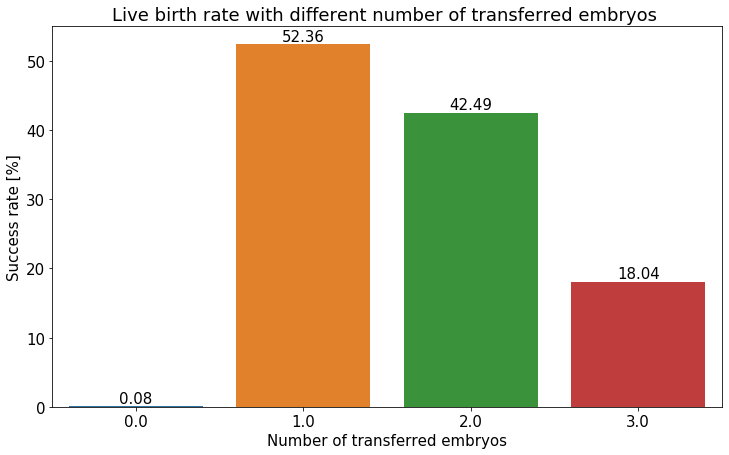

In [255]:
data = df_fresh_treat.groupby(['embryos_transfered', 'is_live_birth']).age.count()
live_birth_rate_embryos_transfered = data.loc[:, 1] / data.loc[:, 0] * 100

fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.barplot(live_birth_rate_embryos_transfered.index, live_birth_rate_embryos_transfered)
annotate_bar(ax)
ax.set_title('Live birth rate with different number of transferred embryos ')
ax.set_xlabel('Number of transferred embryos');
ax.set_ylabel('Success rate [%]');


In [261]:
df_fresh_treat.age.unique()

array(['45-50', '18 - 34', '35-37', '40-42', '38-39', '43-44'],
      dtype=object)

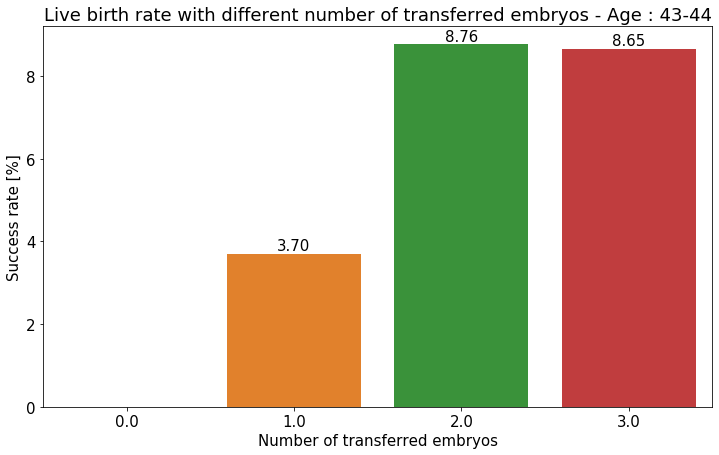

In [265]:
# age_group = '18 - 34'
# age_group = '35-37'
# age_group = '38-39'
# age_group = '40-42'
age_group = '43-44'
# age_group = '45-50'
data = df_fresh_treat.groupby(['embryos_transfered', 'is_live_birth', 'age']).age.count()
live_birth_rate_embryos_transfered = data.loc[:, 1, age_group] / data.loc[:, 0, age_group] * 100

fig, ax = plt.subplots(figsize=(12, 7))
ax = sns.barplot(live_birth_rate_embryos_transfered.index, live_birth_rate_embryos_transfered)
annotate_bar(ax)
ax.set_title(f'Live birth rate with different number of transferred embryos - Age : {age_group}')
ax.set_xlabel('Number of transferred embryos');
ax.set_ylabel('Success rate [%]');



# IUI

Probability of pregnancy with IUI: 15.97 %
Probability of twin if pregnant: 13.46 %


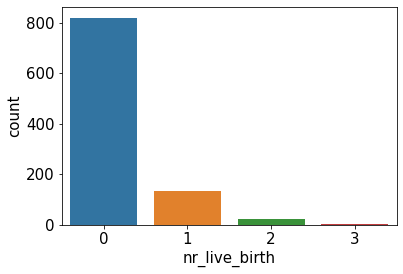

In [64]:
iui_all = df_cols.loc[(df_cols.treat_type=='IUI') & (df_cols.age =='35-37') & (df_cols.is_stimul==1)]
sns.countplot(iui_all.nr_live_birth)
    

probs = iui_all.nr_live_birth.value_counts(normalize=True)*100
prob_twin_if_preg = probs[2]/(100 - probs[0])
print(f'Probability of pregnancy with IUI: {(100 - probs[0]):0.2f} %')
print(f'Probability of twin if pregnant: {prob_twin_if_preg * 100:0.2f} %')

# Modeling 

We can build two types of model:

- Before the patient starts the IVF process based on the prior knowledge we have. 
- After the patient starts the IVF for example after the embryo transfer. 


## Filtering

### Keep the fresh cycles for now

<!-- - Include all cycles i.e the fresh and frozen cycles. -->
- Include only the fresh cycles
- Include all egg sources i.e patient or donor

In [65]:
# select the rows where the cycle is a fresh_cycle
df_cols = df_cols.loc[(df_cols.fresh_cycle==1)]

In [66]:
df_cols.loc[53]

age                                                    18 - 34
nr_prev_ivf                                                  3
nr_ivf_preg                                                  0
nr_ivf_live_birth                                            0
female_primary                                               0
female_secondary                                             0
male_primary                                                 0
male_secondary                                               0
couple_primary                                               0
couple_secondary                                             0
cause_tubal                                                  0
cause_ovulatory                                              1
cause_male                                                   0
cause_unexplained                                            0
cause_endometriosis                                          0
cause_cervical                                         

### Select the IVF and ICSI patients
Predicting the IVF success for IVF and ICSI patients. Select the IVF and ICSI patients first.

In [67]:
df_cols['treat_type'].unique()

array(['ICSI', 'IVF', 'IVF:IVF', 'ICSI:ICSI', 'IVF:Unknown',
       'ICSI:Unknown', 'ICSI:IVF', 'IVF:ICSI', 'FER', 'ICSI / AH',
       'Unknown', 'ICSI / BLASTOCYST ', 'IVF / BLASTOCYST'], dtype=object)

In [68]:
ivf_or_icsi = df_cols['treat_type'].str.contains('IVF') | df_cols['treat_type'].str.contains('ICSI') 
df_ivf = df_cols[ivf_or_icsi]
df_ivf.shape

(109519, 46)

### Select the 'Treatment Now'

We also need to remove the patients who are doing the treatment to store eggs only and keep the 'Treatment Now'

In [69]:
df_ivf['reason_storing_egg'].unique()

array(['Treatment Now ', 'For Storing Eggs ', 'For Storing Embryos ',
       'For Donation ', 'Treatment Now ,For Donation ',
       'For Donation ,For Storing Eggs ',
       'Treatment Now ,For Storing Embryos ',
       'For Donation ,For Storing Embryos ',
       'Treatment Now ,For Donation ,For Storing Embryos ',
       'For Storing Embryos ,For Storing Eggs ,For Research ',
       'For Storing Embryos ,For Storing Eggs ',
       'Treatment Now ,For Research '], dtype=object)

In [70]:
df_ivf = df_ivf[df_ivf['reason_storing_egg'].dropna().str.contains('Treatment Now')]
df_ivf.shape

(94670, 46)

## Encoding the objects

 ### Patient's age
 Label encoding the age groups. The age group is an order category

In [71]:
le = preprocessing.LabelEncoder()
le.fit(df_ivf.age)
print(le.classes_)

# make a new column for label encoded of age
df_ivf.insert(0, 'age_le', le.transform(df_ivf.age))
df_ivf.drop(columns='age', inplace=True)

['18 - 34' '35-37' '38-39' '40-42' '43-44' '45-50']


### Sperm source

In [72]:
le = preprocessing.LabelEncoder()
le.fit(df_ivf.sperm_source)
print(le.classes_)

# make a new column for label encoded of age
df_ivf['sperm_source_le'] = le.transform(df_ivf.sperm_source)
df_ivf.drop(columns='sperm_source', inplace=True)

df_ivf['sperm_source_le'].unique()

['Donor' 'Partner' 'Partner & Donor' 'not assigned']


array([1, 0, 3, 2])

### Egg source

In [73]:
le = preprocessing.LabelEncoder()
le.fit(df_ivf.egg_source)
print(le.classes_)

# make a new column for label encoded of age
df_ivf['egg_source_le'] = le.transform(df_ivf.egg_source)
df_ivf.drop(columns='egg_source', inplace=True)

df_ivf['egg_source_le'].unique()

['Donor' 'Patient']


array([1, 0])

## Feature selection

In [74]:
# df_cols.columns
df_ivf.columns

Index(['age_le', 'nr_prev_ivf', 'nr_ivf_preg', 'nr_ivf_live_birth',
       'female_primary', 'female_secondary', 'male_primary', 'male_secondary',
       'couple_primary', 'couple_secondary', 'cause_tubal', 'cause_ovulatory',
       'cause_male', 'cause_unexplained', 'cause_endometriosis',
       'cause_cervical', 'cause_female', 'cause_sperm_concentrate',
       'cause_sperm_morph', 'cause_sperm_mobility', 'cause_sperm_immun',
       'reason_storing_egg', 'is_stimul', 'ovul_induc', 'egg_donor_age',
       'sperm_donor_age', 'donated_embryo', 'treat_type', 'pgd', 'pgs',
       'elec_single_embryo_trans', 'fresh_egg_collected', 'fresh_egg_stored',
       'total_egg_mixed', 'fresh_cycle', 'frozen_cycle',
       'eggs_mixed_partner_sperm', 'tot_embryo', 'embryos_transfered',
       'is_live_birth', 'nr_live_birth', 'early_outcome', 'fresh_egg_bin',
       'tot_embryo_bin', 'sperm_source_le', 'egg_source_le'],
      dtype='object')

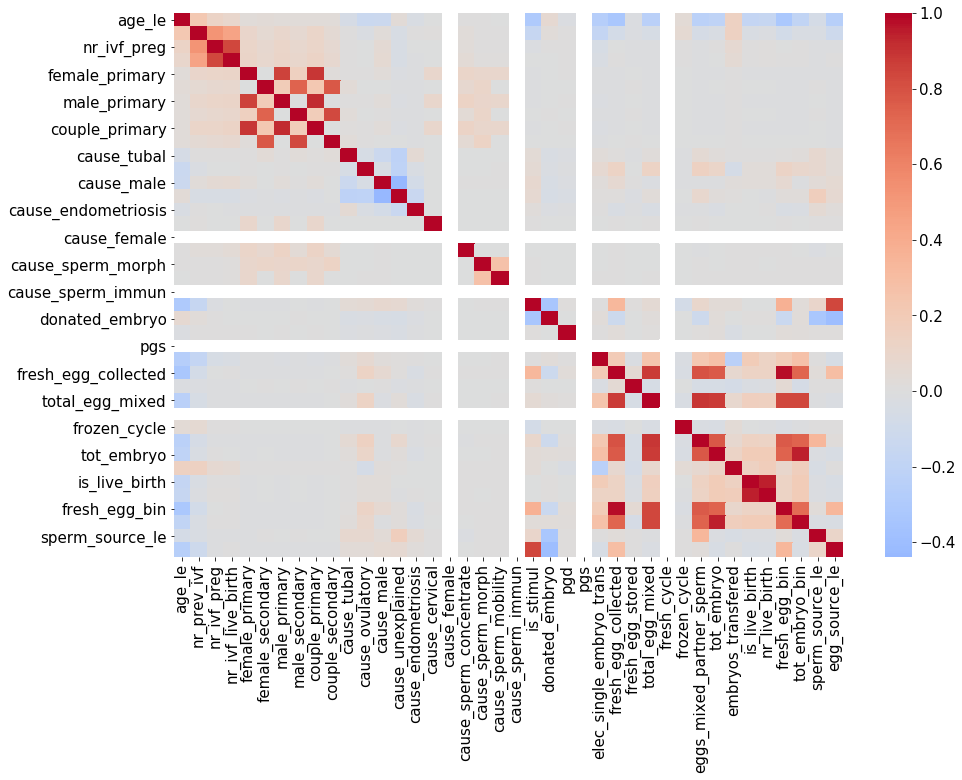

In [75]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_ivf.corr(), cmap='coolwarm', center=0)

In [76]:
abs(df_ivf.corr().is_live_birth).nlargest(15)

is_live_birth               1.000000
nr_live_birth               0.944882
tot_embryo                  0.196319
tot_embryo_bin              0.193418
elec_single_embryo_trans    0.191540
age_le                      0.170804
total_egg_mixed             0.159753
embryos_transfered          0.145786
eggs_mixed_partner_sperm    0.139619
fresh_egg_collected         0.132266
fresh_egg_bin               0.130626
egg_source_le               0.040969
nr_prev_ivf                 0.037311
cause_male                  0.032100
cause_ovulatory             0.029223
Name: is_live_birth, dtype: float64

In [77]:
cols_all = ['age_le', 'nr_prev_ivf', 'nr_ivf_preg', 'nr_ivf_live_birth',
       'female_primary', 'female_secondary', 'male_primary', 'male_secondary',
       'couple_primary', 'couple_secondary', 'cause_tubal', 'cause_ovulatory',
       'cause_male', 'cause_unexplained', 'cause_endometriosis',
       'cause_cervical', 'cause_sperm_concentrate',
       'cause_sperm_morph', 'cause_sperm_mobility',
       'is_stimul', 'pgd', 
       'elec_single_embryo_trans', 'sperm_source_le',
       'fresh_egg_collected', 'total_egg_mixed',
       'frozen_cycle', 'eggs_mixed_partner_sperm', 'tot_embryo',
       'embryos_transfered', 'is_live_birth']


# cols_before_ivf = ['age_le', 'cause_ovulatory', 'cause_male','nr_prev_ivf', 'is_stimul', 'is_live_birth', 
#                    'sperm_source_le', 'egg_source_le'
#                 ]

cols_before_ivf = ['age_le', 'is_stimul', 'is_live_birth', 
                   'sperm_source_le', 'egg_source_le', 'cause_male'
                ]

test_dict_before_ivf = {'age_le':1, 'is_stimul':1, 'sperm_source_le':1, 'egg_source_le':1, 'cause_male':0}

# features selected by RFE
cols_before_ivf_rfe = ['age_le', 'is_live_birth', 'sperm_source_le', 'egg_source_le', 'cause_male'
                ]


# cols_after_ivf = ['age_le', 'is_stimul', 'fresh_egg_collected', 'nr_prev_ivf', 'embryos_transfered',
#                    'elec_single_embryo_trans', 'tot_embryo', 'is_live_birth'
#                  ]

cols_after_ivf = ['age_le', 'is_stimul', 'fresh_egg_bin', 'embryos_transfered',
                   'sperm_source_le', 'egg_source_le', 'tot_embryo_bin', 'is_live_birth'
                 ]

test_dict_after_ivf = {'age_le':1, 'is_stimul':1, 'fresh_egg_bin':3, 'embryos_transfered':1,
                   'sperm_source_le':1, 'egg_source_le':1, 'tot_embryo_bin':1
            }


cols_after_ivf_rfe = ['age_le', 'embryos_transfered', 'tot_embryo', 'is_live_birth']



# sperm_source_le --> ['Donor' 'Partner' 'Partner & Donor' 'not assigned']
# egg_source_le --> ['Donor' 'Patient']


# select after or before IVF cols

if before_ivf:
    test_dict = test_dict_before_ivf
    cols_model = cols_before_ivf
else:
    cols_model = cols_after_ivf
    test_dict = test_dict_after_ivf
    
df_ivf_cols = df_ivf[cols_model].copy()
df_ivf_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94670 entries, 1 to 148105
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age_le              94670 non-null  int64  
 1   is_stimul           94670 non-null  int64  
 2   fresh_egg_bin       94670 non-null  float64
 3   embryos_transfered  94670 non-null  float64
 4   sperm_source_le     94670 non-null  int64  
 5   egg_source_le       94670 non-null  int64  
 6   tot_embryo_bin      94670 non-null  float64
 7   is_live_birth       94670 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 6.5 MB


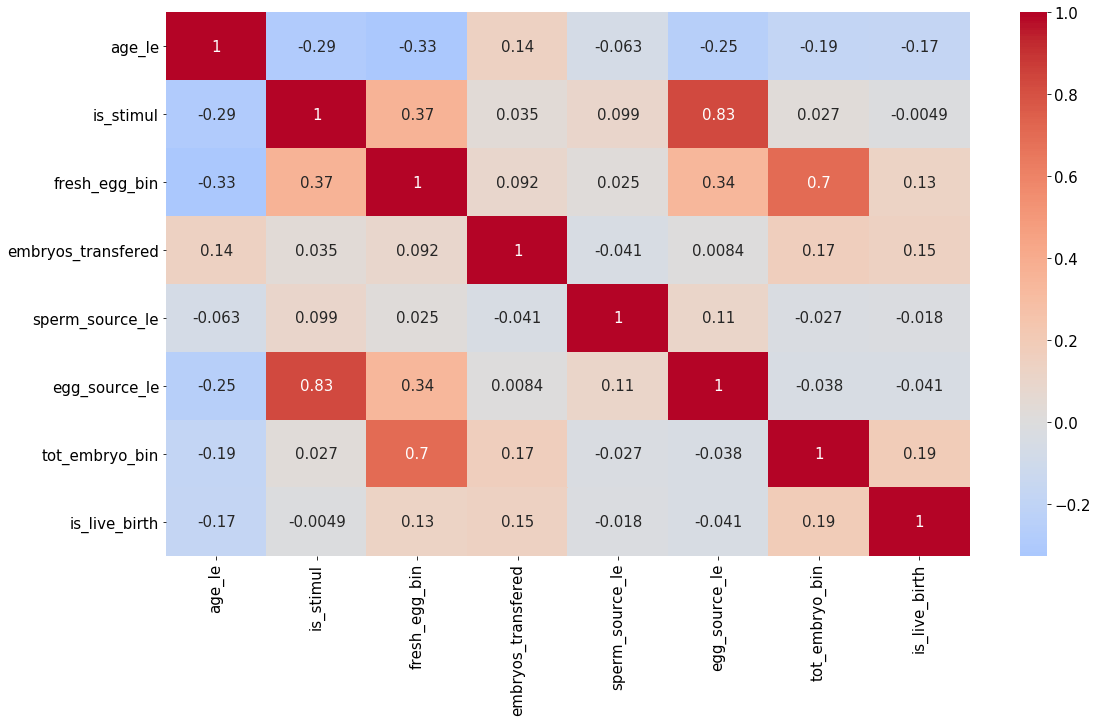

In [78]:
fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(df_ivf_cols.corr(), cmap='coolwarm', annot=True, center=0)

## Check missing data

## Check skewness

In [79]:
df_ivf_cols.is_live_birth.skew()

1.0424909410264744

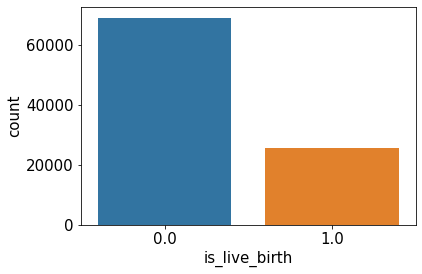

In [80]:
sns.countplot(df_ivf_cols.is_live_birth)

### Balance the dataset

Among the class 0, randomly select as many rows as class 1.

In [81]:
# one_class_len = len(df_ivf_cols[df_ivf_cols.is_live_birth==1])

# ratio = 2

# df_ivf_class0 = df_ivf_cols[df_ivf_cols.is_live_birth==0].sample(int(ratio * one_class_len), random_state=1)
# df_ivf_class1 = df_ivf_cols[df_ivf_cols.is_live_birth==1]
# df_ivf_balanced = pd.concat([df_ivf_class0, df_ivf_class1], axis=0)

# # df_ivf_balanced.reset_index(drop=True, inplace=True)
# df_ivf_balanced.shape

# skip balacing
df_ivf_balanced = df_ivf_cols

## Normalization

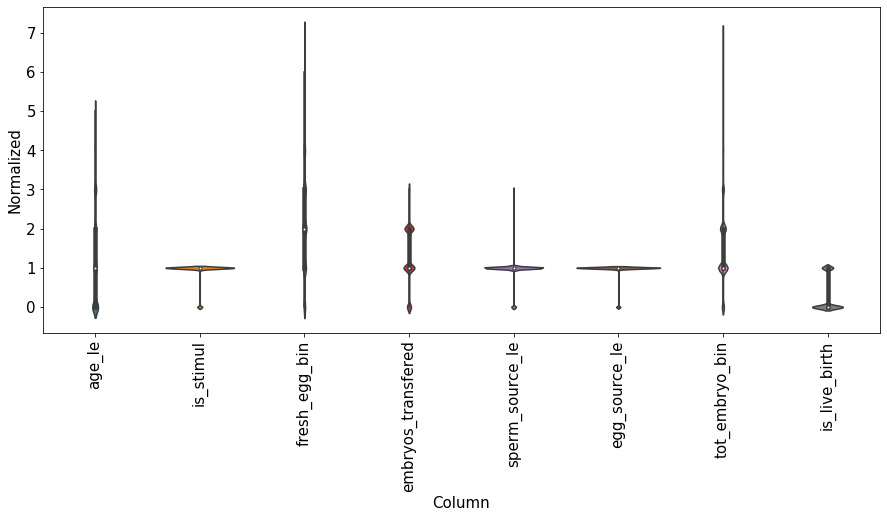

In [82]:
# standard scaling
def standard_scale(series):    
    return (series - series.mean()) / series.std()

normalization = False
# normalization = 'standard'
# normalization = 'minmax'

if normalization == 'minmax':
    df_ivf_balanced = (df_ivf_balanced - df_ivf_balanced.min())/(df_ivf_balanced.max()- df_ivf_balanced.min())
elif normalization == 'standard':
    df_ivf_balanced.embryos_transfered = standard_scale(df_ivf_balanced.embryos_transfered)
    df_ivf_balanced.tot_embryo = standard_scale(df_ivf_balanced.tot_embryo)
    df_ivf_balanced.fresh_egg_collected = standard_scale(df_ivf_balanced.fresh_egg_collected)
    df_ivf_balanced.total_egg_mixed = standard_scale(df_ivf_balanced.total_egg_mixed)
    df_ivf_balanced.eggs_mixed_partner_sperm = standard_scale(df_ivf_balanced.eggs_mixed_partner_sperm)
    df_ivf_balanced.eggs_mixed_partner_sperm = standard_scale(df_ivf_balanced.eggs_mixed_partner_sperm)
elif normalization == False:
    pass 

data = df_ivf_balanced.melt(var_name='Column', value_name='Normalized')
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=data)
ax.tick_params(axis='x', labelrotation=90)


## Save the dataset

In [83]:
# Save the dataset that contains both after and before ivf cols
common_cols = list(set(cols_before_ivf+cols_after_ivf))
df_ivf[common_cols].to_csv('../UK Datasets/df_ivf_2005_2016.csv', index=False)
df_ivf[common_cols].shape

(94670, 9)

## Train, test split

In [84]:
X = df_ivf_balanced.loc[:, df_ivf_balanced.columns!='is_live_birth']
y = df_ivf_balanced.loc[:,'is_live_birth']

## Modeling help functions

In [85]:
def plot_roc(y_test, probs):

    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate scores
    roc_auc_score = metrics.roc_auc_score(y_test, probs)
    # summarize scores
    print('ROC AUC=%.3f' % (roc_auc_score))
    # calculate roc curves
    fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)
    # get the best threshold
    J = tpr - fpr
    ix = np.nanargmax(J)
    best_thresh = thresholds[ix]
    print('Best Threshold ROC=%f' % (best_thresh))
    # plot the roc curve for the model
    plt.plot(fpr, tpr)
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the plot
    plt.show()
    
    return best_thresh

In [86]:
def plot_precision_recall(y_test, probs):

    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate roc curves
    precision, recall, thresholds = metrics.precision_recall_curve(y_test, probs)
    # convert to f score
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = np.nanargmax(fscore)
    best_thresh = thresholds[ix]
    print('Best Threshold precision_recall=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
    # calculate scores
    pr_auc_score = metrics.auc(recall, precision)
    # summarize scores
    print('PR AUC=%.3f' % (pr_auc_score))
    # plot the roc curve for the model
    plt.plot(recall, precision, label='Model')
    no_skill = len(y_test[y_test==1]) / len(y_test)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the plot
    plt.legend()
    plt.show()
    
    return best_thresh

In [87]:
def x_validate(model, X, y):
    # prepare the cross-validation procedure
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    # evaluate model
    cv_results = cross_validate(model, X, y, scoring=['accuracy', 'recall', 'precision', 'f1'], cv=cv, n_jobs=-1)
    # report performance
    print('Test accuracy: %.3f (%.3f)' % (np.mean(cv_results['test_accuracy']), np.std(cv_results['test_accuracy'])))
    print('Recall: %.3f (%.3f)' % (np.mean(cv_results['test_recall']), np.std(cv_results['test_recall'])))
    print('precision: %.3f (%.3f)' % (np.mean(cv_results['test_precision']), np.std(cv_results['test_precision'])))
    print('F1_score: %.3f (%.3f)' % (np.mean(cv_results['test_f1']), np.std(cv_results['test_f1'])))
    return cv_results

In [88]:
# cross validation function

def do_evaluate(model, X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)
    model.fit(X_train, y_train)
    # predict probabilities
    probs = model.predict_proba(X_test)
    # ROC AUC curve and score
    best_thresh_roc = plot_roc(y_test, probs)
    # Precision/Recall AUC curve and score
    best_thresh_pr = plot_precision_recall(y_test, probs)
    best_thresh = 0.5
    best_thresh = best_thresh_pr
    # predict y_pred with best threshold based on ROC
    y_pred = (probs[:,1] >= best_thresh).astype('int')

    y_train_pred = model.predict(X_train)
    print('###### Performance of ', model.__class__.__name__, '######')
    print(f'Train accuracy: {metrics.accuracy_score(y_train, y_train_pred): .2f}')

    cm = metrics.confusion_matrix(y_test, y_pred)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    plt.figure()
    disp.plot() 
    
    x_validate(model, X, y)
    return model


In [89]:
def do_feature_select(model, X, y):
    
    cv_results_all = []
    for i in range(2, X.shape[1]+1):
        print(f'###### number of feature selected: {i} ######')
        rfe = RFE(estimator = lr, n_features_to_select=i)
        pipeline = Pipeline(steps=[('s', rfe), ('m', model)])
        # prepare the cross-validation procedure
        cv = KFold(n_splits=10, random_state=1, shuffle=True)
        # evaluate model
        cv_results = cross_validate(pipeline, X, y, scoring=['accuracy', 'recall', 'precision', 'f1'], cv=cv, n_jobs=-1)        
        cv_results_all.append(cv_results)
        
        # fit RFE
        rfe.fit(X, y)
        # summarize all features
        for j in range(X.shape[1]):
            if rfe.support_[j] == True:
                print(f'column: {X.columns[j]}')
                print('--------')


    ax, fig = plt.subplots()
    fig.plot(range(2, X.shape[1]+1), [np.mean(cv_results_all[i]['test_f1']) for i in range(len(cv_results_all))])
    

In [90]:
def do_pca(model, X, y):
    
    cv_results_all = []
    for i in range(2, X.shape[1]+1):
        print(f'###### number of components: {i} ######')
        pca = PCA(n_components=i)
        pipeline = Pipeline(steps=[('pca', pca), ('m', model)])
        # prepare the cross-validation procedure
        cv = KFold(n_splits=10, random_state=1, shuffle=True)
        # evaluate model
        cv_results = cross_validate(pipeline, X, y, scoring=['accuracy', 'recall', 'precision', 'f1'], cv=cv, n_jobs=-1)        
        cv_results_all.append(cv_results)
        
    ax, fig = plt.subplots()
    fig.plot(range(2, X.shape[1]+1), [np.mean(cv_results_all[i]['test_f1']) for i in range(len(cv_results_all))])

In [91]:
def do_calibration(model, X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)
    
    # uncalibrated 
    def uncalibrated(model, X_train, y_train, X_test):
    
        model.fit(X_train, y_train)
        # predict probabilities for the positive outcome only
        return model.predict_proba(X_test)[:,1]
    
    # calibrated 
    def calibrated(model, X_train, y_train, X_test):
        
        # define and fit calibration model
        calibrated_model = CalibratedClassifierCV(model, method='sigmoid', cv=5)
        calibrated_model.fit(X_train, y_train)
        # predict probabilities
        return calibrated_model, calibrated_model.predict_proba(X_test)[:, 1]
     
    # reliability diagram
    probs_uncal = uncalibrated(model, X_train, y_train, X_test)
    calibrated_model, probs_cal = calibrated(model, X_train, y_train, X_test)
    
    prob_true_uncal, prob_pred_uncal = calibration_curve(y_test, probs_uncal, n_bins=10)
    print(f'Log loss - uncalibrated: {metrics.log_loss(y_test, probs_uncal):0.2f}')
    
    prob_true_cal, prob_pred_cal = calibration_curve(y_test, probs_cal, n_bins=10)
    print(f'Log loss - calibrated: {metrics.log_loss(y_test, probs_cal):0.2f}')
    
    plt.figure(figsize=(10, 5))
    # plot perfectly calibrated
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot model reliability
    plt.plot(prob_pred_uncal, prob_true_uncal, marker='.', label='uncalibrated')
    plt.plot(prob_pred_cal, prob_true_cal, marker='.', label='calibrated')
    plt.legend()
    plt.ylabel('Probability True')
    plt.xlabel('Probability Predicted')
    return calibrated_model

## Logistic regression

Log loss - uncalibrated: 0.54
Log loss - calibrated: 0.54


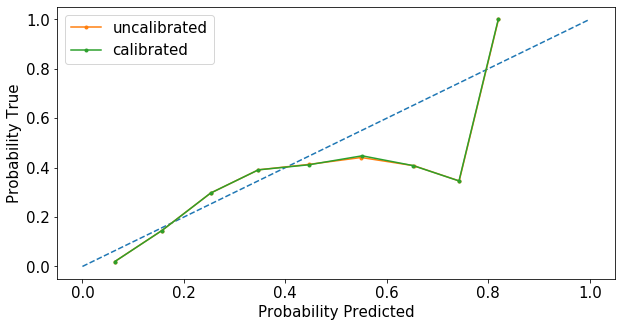

In [92]:
from sklearn.linear_model import LogisticRegression
filename = savepath + 'lr' + str(before_ivf) + '.sav'
filename_calibrated = savepath + 'lr_calibrated' + str(before_ivf) + '.sav'

lr = LogisticRegression(random_state=100)

if feature_select: 
    do_feature_select(lr, X, y)
elif pca:
    do_pca(lr, X, y)
elif evaluate:
    lr = do_evaluate(lr, X, y)
    # save the model to disk
    pickle.dump(lr, open(filename, 'wb'))
elif calibration:
    calibrated_lr = do_calibration(lr, X, y)
    # save the model to disk
    pickle.dump(calibrated_lr, open(filename_calibrated, 'wb'))
elif load_model:
    lr = pickle.load(open(filename, 'rb'))
    calibrated_lr = pickle.load(open(filename_calibrated, 'rb'))



## Decision Tree

Log loss - uncalibrated: 0.51
Log loss - calibrated: 0.50


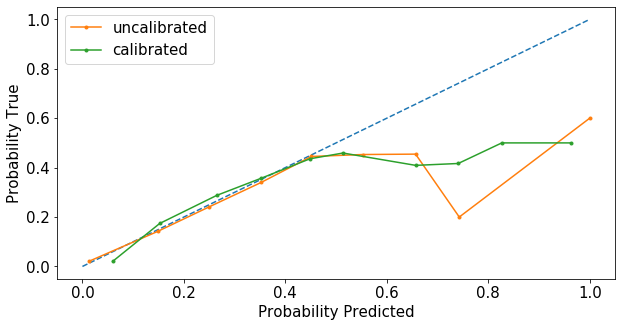

In [93]:
from sklearn.tree import DecisionTreeClassifier
filename = savepath + 'dtc' + str(before_ivf) + '.sav'
filename_calibrated = savepath + 'dtc_calibrated' + str(before_ivf) + '.sav'

dtc = DecisionTreeClassifier(max_depth=10, random_state=100)

if feature_select: 
    do_feature_select(dtc, X, y)
elif pca:
    do_pca(dtc, X, y)
elif evaluate:
    dtc = do_evaluate(dtc, X, y)
    # save the model to disk
    pickle.dump(dtc, open(filename, 'wb'))
elif calibration:
    calibrated_dtc = do_calibration(dtc, X, y)
    # save the model to disk
    pickle.dump(calibrated_dtc, open(filename_calibrated, 'wb'))
elif load_model:
    dtc = pickle.load(open(filename, 'rb'))
    calibrated_dtc = pickle.load(open(filename_calibrated, 'rb'))

## Random Forest

Log loss - uncalibrated: 0.50
Log loss - calibrated: 0.51


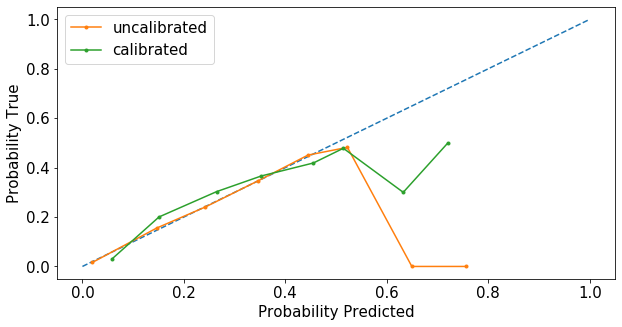

In [94]:
from sklearn.ensemble import RandomForestClassifier
filename = savepath + 'rfc' + str(before_ivf) + '.sav'
filename_calibrated = savepath + 'rfc_calibrated' + str(before_ivf) + '.sav'

rfc = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=100)

if feature_select: 
    do_feature_select(rfc, X, y)
elif pca:
    do_pca(rfc, X, y)
elif evaluate:
    rfc = do_evaluate(rfc, X, y)
    # save the model to disk
    pickle.dump(rfc, open(filename, 'wb'))
elif calibration:
    calibrated_rfc = do_calibration(rfc, X, y)
    # save the model to disk
    pickle.dump(calibrated_rfc, open(filename_calibrated, 'wb'))
elif load_model:
    rfc = pickle.load(open(filename, 'rb'))
    calibrated_rfc = pickle.load(open(filename_calibrated, 'rb'))

## MLP 

Log loss - uncalibrated: 0.49
Log loss - calibrated: 0.50


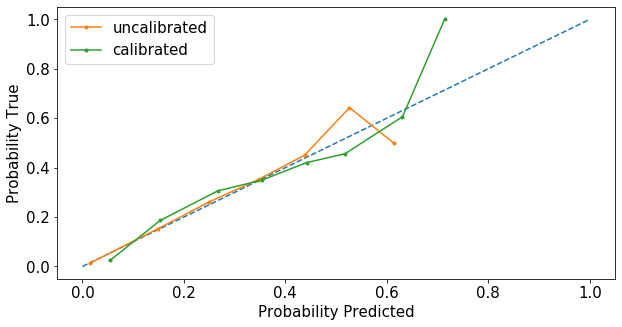

In [95]:
from sklearn.neural_network import MLPClassifier
filename = savepath + 'mlpc' + str(before_ivf) + '.sav'
filename_calibrated = savepath + 'mlpc_calibrated' + str(before_ivf) + '.sav'

mlpc = MLPClassifier(hidden_layer_sizes=(20, 10), activation="relu",random_state=100, max_iter=100)

if feature_select: 
    do_feature_select(mlpc, X, y)
elif pca:
    do_pca(mlpc, X, y)
elif evaluate:
    mlpc = do_evaluate(mlpc, X, y)
    # save the model to disk
    pickle.dump(mlpc, open(filename, 'wb'))
elif calibration:
    calibrated_mlpc = do_calibration(mlpc, X, y)
    # save the model to disk
    pickle.dump(calibrated_mlpc, open(filename_calibrated, 'wb'))
elif load_model:
    mlpc = pickle.load(open(filename, 'rb'))
    calibrated_mlpc = pickle.load(open(filename_calibrated, 'rb'))

Recall is the true positive rate. i.e. the percentage of those cycles with live birth that we have classified correctly. 

We have too many false positive (high false positive rate)... cases that didn't have live birth, what we predict them as having live birth. --> looks like the model is not doing a good job for class 0.

# Show results

In [194]:
def filter_data(X, y, test_dict):
    i=0
    for key, value in test_dict.items():
        filter_idx = X.index[X[key]==value].tolist()
        if i == 0:
            filter_idx_common = filter_idx
        else:
            filter_idx_common = np.intersect1d(filter_idx, filter_idx_common)
        i += 1

    return filter_idx_common

def filter_data_df(X, y, test_df):
    i=0
    for column in test_df.columns:
        filter_idx = X.index[X[column]==test_df[column][0]].tolist()
        if i == 0:
            filter_idx_common = filter_idx
        else:
            filter_idx_common = np.intersect1d(filter_idx, filter_idx_common)
        i += 1

    return filter_idx_common


In [97]:
def print_probs(X, y, test_dict):
    
    # print true underlying probability based on given input
    filter_idx_common = filter_data(X, y, test_dict)
    
    if filter_idx_common.size>0:
        # filtering
        filter_X = X.loc[filter_idx_common]
        filter_y = y.loc[filter_idx_common]

        print(f'Found {len(filter_idx_common)} data samples')
        print(f'True prob: {len(filter_y.loc[filter_y==1])/len(filter_y) * 100:0.02f}%')
    else:
        print('No samples found with the given criteria.')

    test = pd.Series(test_dict)
    # Uncalibrated
    print(' ')
    print(f'LR predicted prob: {lr.predict_proba(np.array(test).reshape(1, -1))[0, 1] * 100:0.2f}%')
    print(f'DT predicted prob: {dtc.predict_proba(np.array(test).reshape(1, -1))[0, 1] * 100:0.2f}%')
    print(f'RF predicted prob: {rfc.predict_proba(np.array(test).reshape(1, -1))[0, 1] * 100:0.2f}%')
    print(f'MLP predicted prob: {mlpc.predict_proba(np.array(test).reshape(1, -1))[0, 1] * 100:0.2f}%')
    
    # Calibrated
    print(' ')
    print(f'LR predicted prob (calibrated): {calibrated_lr.predict_proba(np.array(test).reshape(1, -1))[0, 1] * 100:0.2f}%')
    print(f'DT predicted prob (calibrated): {calibrated_dtc.predict_proba(np.array(test).reshape(1, -1))[0, 1] * 100:0.2f}%')
    print(f'RF predicted prob (calibrated): {calibrated_rfc.predict_proba(np.array(test).reshape(1, -1))[0, 1] * 100:0.2f}%')
    print(f'MLP predicted prob (calibrated): {calibrated_mlpc.predict_proba(np.array(test).reshape(1, -1))[0, 1] * 100:0.2f}%')
    

In [98]:
def plot_distribution(df_ivf, filter_idx_common):
    ### Distribution of fresh eggs collected
    # Histogram of fresh eggs collected from patients with similar attributes
    
    if filter_idx_common.size>0:
        data = df_ivf.loc[filter_idx_common].fresh_egg_collected
        data_plot = data.value_counts(normalize=True)

        print(' ')
        print('##### Histogram of fresh egg collected #####')
        print('Mean of fresh egg collected:', round(data.mean(), 2))
        print('Median of fresh egg collected:', round(data.median(),2))

        fig, ax = plt.subplots(figsize=(15, 5))
        ax = sns.barplot(x=data_plot.index.astype('int'), y=data_plot*100)
        ax.set_ylabel('Percentage of cycles (%)');
        ax.set_xlabel('Number of collected fresh eggs in a cycle');

        ### Distribution of total embryos
        # Histogram of total embryos created from patients with similar attributes

        data = df_ivf.loc[filter_idx_common].tot_embryo
        data_plot = data.value_counts(normalize=True)

        print(' ')
        print('##### Histogram of total embryos #####')
        print('Mean of total embryos:', round(data.mean(), 2))
        print('Median of total embryos:', round(data.median(), 2))

        fig, ax = plt.subplots(figsize=(15, 5))
        ax = sns.barplot(x=data_plot.index.astype('int'), y=data_plot*100)
        ax.set_ylabel('Percentage of cycles (%)');
        ax.set_xlabel('Number of collected total embryos in a cycle');

### Show results before or after IVF

Find true underlying probability for a given input condition and then compare with the predicted probabilities from the models

The true probability should NOT be based on the balanced IVF dataset

In [99]:
X_total = df_ivf.loc[:, df_ivf.columns!='is_live_birth']
y_total = df_ivf.loc[:,'is_live_birth']

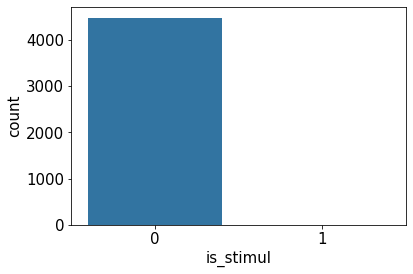

In [100]:
# when egg source is set to donor, the is_stimul should be set to 0. 
sns.countplot(df_ivf_cols[df_ivf_cols.egg_source_le==0].is_stimul)

In [101]:
# plt.subplots(figsize=(10, 5))
# sns.countplot(df_ivf[(df_ivf.is_stimul==0) & (df_ivf.egg_source_le==1)].fresh_egg_collected.astype('int'))

In [108]:
test_dict = {'age_le':0, 'is_stimul':1, 'fresh_egg_bin':2, 'embryos_transfered':1,
                   'sperm_source_le':1, 'egg_source_le':1, 'tot_embryo_bin':1
            }

if before_ivf:
    print('###### Results Before IVF ######')
    filter_idx_common = filter_data(X_total, X_total, test_dict)
    print_probs(X_total, y_total, test_dict)
    plot_distribution(df_ivf, filter_idx_common)
else:
    print('###### Results After IVF ######')
    filter_idx_common = filter_data(X_total, y_total, test_dict)
    print_probs(X_total, y_total, test_dict)

###### Results After IVF ######
Found 4033 data samples
True prob: 37.04%
 
LR predicted prob: 26.13%
DT predicted prob: 36.92%
RF predicted prob: 36.74%
MLP predicted prob: 35.05%
 
LR predicted prob (calibrated): 26.13%
DT predicted prob (calibrated): 35.37%
RF predicted prob (calibrated): 35.87%
MLP predicted prob (calibrated): 36.38%


# Verification

In [140]:
def bin_fresh_egg(test_df):
    egg_bins = [-np.inf, 0, 5, 10, 15, 20, 25, 30, np.inf]
    egg_labels = ['0', '1', '2', '3', '4', '5', '6', '7']
    test_df.insert(2, 'fresh_egg_bin', pd.cut(test_df['fresh_egg_collected'], bins=egg_bins, labels=egg_labels, ordered=True).astype(float))
    test_df.drop('fresh_egg_collected', axis=1, inplace=True)
    return test_df

def bin_tot_embryo(test_df):
    embryo_bins = [-np.inf, 0, 5, 10, 15, 20, 25, 30, np.inf]
    embryo_labels = ['0', '1', '2', '3', '4', '5', '6', '7']
    test_df.insert(6, 'tot_embryo_bin', pd.cut(test_df['tot_embryo'], bins=embryo_bins, labels=embryo_labels, ordered=True).astype(float))
    test_df.drop('tot_embryo', axis=1, inplace=True)
    return test_df

test_dict = {'age_le':0, 'is_stimul':1, 'fresh_egg_collected':11, 'embryos_transfered':1,
                   'sperm_source_le':1, 'egg_source_le':1, 'tot_embryo':6
            }

test_df = pd.DataFrame([test_dict])
test_df = bin_fresh_egg(test_df)
test_df = bin_tot_embryo(test_df)
test_df

,age_le,is_stimul,fresh_egg_bin,embryos_transfered,sperm_source_le,egg_source_le,tot_embryo_bin
0,0,1,3.0,1,1,1,2.0


## Age

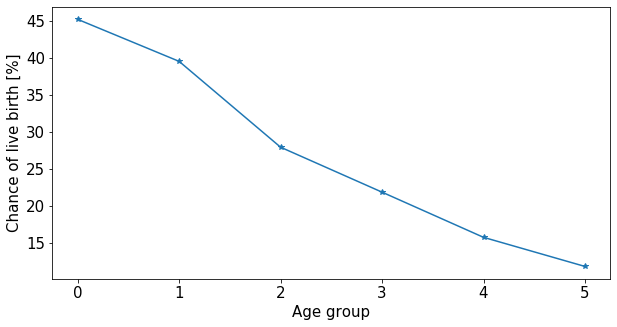

In [209]:
test_dict = {'age_le':0, 'is_stimul':1, 'fresh_egg_collected':10, 'embryos_transfered':1,
                   'sperm_source_le':1, 'egg_source_le':1, 'tot_embryo':6
            }

test_df = pd.DataFrame([test_dict])
test_df = bin_fresh_egg(test_df)
test_df = bin_tot_embryo(test_df)


age_range = np.arange(6)

prob = []                                
for age in age_range:
    test_df['age_le']= age
    prob.append(rfc.predict_proba(np.array(test_df).reshape(1, -1))[0, 1]*100)

                                        
ax, fig = plt.subplots(figsize=(10, 5))
ax = plt.plot(prob, '-*')
fig.set_xlabel('Age group')
fig.set_ylabel('Chance of live birth [%]');

                                        

## Fresh egg collected

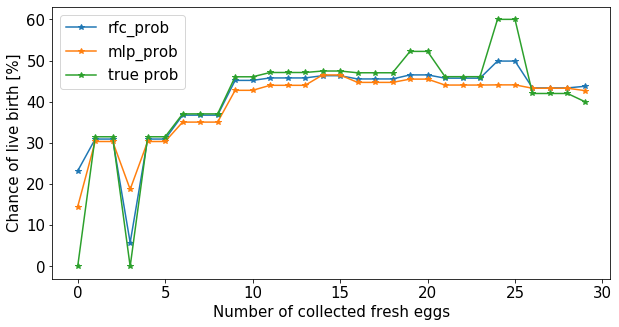

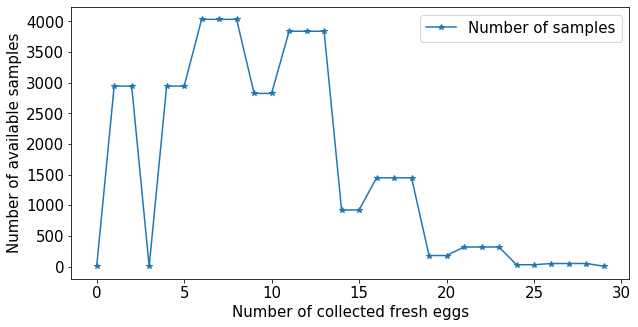

In [196]:
if not before_ivf:
    
    test_dict = {'age_le':0, 'is_stimul':1, 'fresh_egg_collected':0, 'embryos_transfered':1,
                       'sperm_source_le':1, 'egg_source_le':1, 'tot_embryo':0
                }




    fresh_egg_range = np.arange(0, 30)


    prob_mlp = []
    prob_rfc = []
    nr_samples = []
    true_prob = []
    for nr_eggs in fresh_egg_range:
        test_dict['fresh_egg_collected']= nr_eggs
        test_dict['tot_embryo'] = np.abs(nr_eggs-3)
        test_df = pd.DataFrame([test_dict])
        test_df = bin_fresh_egg(test_df)
        test_df = bin_tot_embryo(test_df)
        prob_mlp.append(mlpc.predict_proba(np.array(test_df).reshape(1, -1))[0, 1]*100)
        prob_rfc.append(rfc.predict_proba(np.array(test_df).reshape(1, -1))[0, 1]*100)

        # True prob if exist
        filter_idx_common = filter_data_df(X, y, test_df)
        if filter_idx_common.size>0:
            # filtering
            filter_X = X.loc[filter_idx_common]
            filter_y = y.loc[filter_idx_common]

            nr_samples.append(len(filter_idx_common))
            true_prob.append(len(filter_y.loc[filter_y==1])/len(filter_y) * 100)
        else:
            nr_samples.append(0)
            true_prob.append(np.nan)

    ax, fig = plt.subplots(figsize=(10, 5))
    ax = plt.plot(prob_rfc, '-*', label='rfc_prob')
    ax = plt.plot(prob_mlp, '-*', label='mlp_prob')
    ax = plt.plot(true_prob, '-*', label='true prob')
    fig.set_xlabel('Number of collected fresh eggs')
    fig.set_ylabel('Chance of live birth [%]');
    fig.legend()

    ax, fig = plt.subplots(figsize=(10, 5))
    ax = plt.plot(nr_samples, '-*', label='Number of samples')
    fig.set_xlabel('Number of collected fresh eggs')
    fig.set_ylabel('Number of available samples');
    fig.legend()
    




## Total embryos

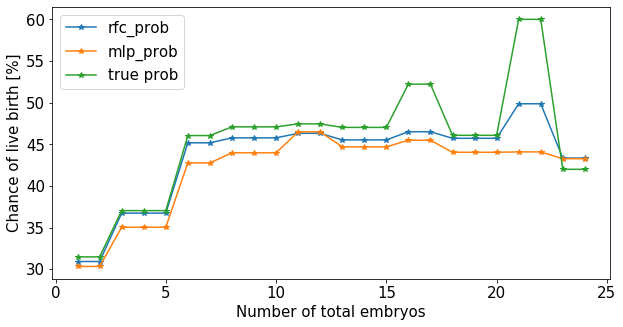

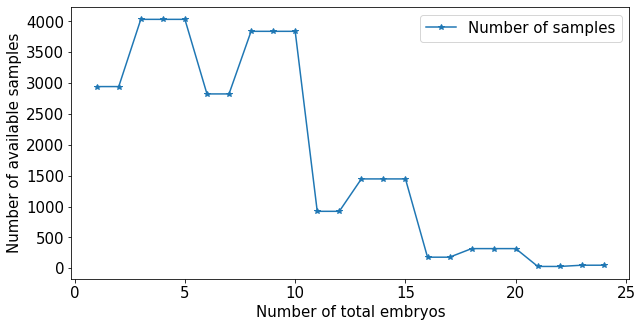

In [211]:
if not before_ivf:
    
    test_dict = {'age_le':0, 'is_stimul':1, 'fresh_egg_collected':0, 'embryos_transfered':1,
                       'sperm_source_le':1, 'egg_source_le':1, 'tot_embryo':0
                }



    tot_embryo_range = np.arange(1, 25)


    prob_mlp = []
    prob_rfc = []
    nr_samples= []
    true_prob = []
    for nr_embryos in tot_embryo_range:

        test_dict['tot_embryo'] = nr_embryos
        test_dict['fresh_egg_collected']= nr_embryos + 3
        test_df = pd.DataFrame([test_dict])
        test_df = bin_fresh_egg(test_df)
        test_df = bin_tot_embryo(test_df)

        prob_mlp.append(mlpc.predict_proba(np.array(test_df).reshape(1, -1))[0, 1]*100)
        prob_rfc.append(rfc.predict_proba(np.array(test_df).reshape(1, -1))[0, 1]*100)

        # True prob if exist
        filter_idx_common = filter_data_df(X, y, test_df)
        if filter_idx_common.size>0:
            # filtering
            filter_X = X.loc[filter_idx_common]
            filter_y = y.loc[filter_idx_common]

            nr_samples.append(len(filter_idx_common))
            true_prob.append(len(filter_y.loc[filter_y==1])/len(filter_y) * 100)
        else:
            nr_samples.append(0)
            true_prob.append(np.nan)

    ax, fig = plt.subplots(figsize=(10, 5))
    ax = plt.plot(tot_embryo_range, prob_rfc, '-*', label='rfc_prob')
    ax = plt.plot(tot_embryo_range, prob_mlp, '-*', label='mlp_prob')
    ax = plt.plot(tot_embryo_range, true_prob, '-*', label='true prob')
    fig.set_xlabel('Number of total embryos')
    fig.set_ylabel('Chance of live birth [%]');
    fig.legend()

    ax, fig = plt.subplots(figsize=(10, 5))
    ax = plt.plot(tot_embryo_range, nr_samples, '-*', label='Number of samples')
    fig.set_xlabel('Number of total embryos')
    fig.set_ylabel('Number of available samples');
    fig.legend()



## Embryos transferred

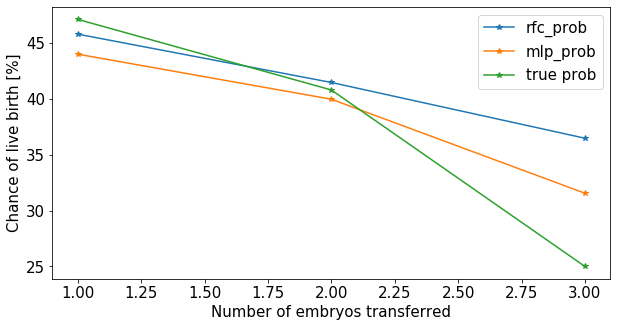

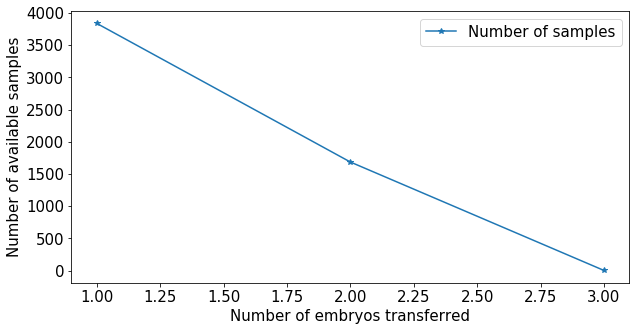

In [207]:
if not before_ivf:
    
    test_dict = {'age_le':0, 'is_stimul':1, 'fresh_egg_collected':15, 'embryos_transfered':1,
                       'sperm_source_le':1, 'egg_source_le':1, 'tot_embryo':8
                }

    embryos_transfered_range = np.arange(1, 4)



    prob_mlp = []
    prob_rfc = []
    nr_samples= []
    true_prob = []
    for nr_embryos in embryos_transfered_range:
        test_dict['embryos_transfered']= nr_embryos
        test_df = pd.DataFrame([test_dict])
        test_df = bin_fresh_egg(test_df)
        test_df = bin_tot_embryo(test_df)

        prob_mlp.append(mlpc.predict_proba(np.array(test_df).reshape(1, -1))[0, 1]*100)
        prob_rfc.append(rfc.predict_proba(np.array(test_df).reshape(1, -1))[0, 1]*100)

        # True prob if exist
        filter_idx_common = filter_data_df(X, y, test_df)
        if filter_idx_common.size>0:
            # filtering
            filter_X = X.loc[filter_idx_common]
            filter_y = y.loc[filter_idx_common]

            nr_samples.append(len(filter_idx_common))
            true_prob.append(len(filter_y.loc[filter_y==1])/len(filter_y) * 100)
        else:
            nr_samples.append(0)
            true_prob.append(np.nan)

    ax, fig = plt.subplots(figsize=(10, 5))
    ax = plt.plot(embryos_transfered_range, prob_rfc, '-*', label='rfc_prob')
    ax = plt.plot(embryos_transfered_range, prob_mlp, '-*', label='mlp_prob')
    ax = plt.plot(embryos_transfered_range, true_prob, '-*', label='true prob')
    fig.set_xlabel('Number of embryos transferred')
    fig.set_ylabel('Chance of live birth [%]');
    fig.legend()

    ax, fig = plt.subplots(figsize=(10, 5))
    ax = plt.plot(embryos_transfered_range, nr_samples, '-*', label='Number of samples')
    fig.set_xlabel('Number of embryos transferred')
    fig.set_ylabel('Number of available samples');
    fig.legend()




In [ ]:
prob_mlp